(I have added a description of the task here just for my reference.)

Dataset Description

The dataset represents an average spread per hour across multiple days for two financial instruments. Spread is the difference between the ask price (buy) and the bid price (sell).
There are three columns in the dataset:

- quote_hour: UTC timestamp when the data was recorded.
- symbol: The symbol representing a financial instrument.
- avg_spread: The average spread for the given hour and symbol.

Import Libraries and Load Data:

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the CSV file
df = pd.read_csv('Stratos_test_task_spreads.csv')

# check input exists
df.head(10)

,quote_hour,symbol,avg_spread
0,2/12/2024 0:00,US30,4.80
1,2/12/2024 1:00,US30,4.80
2,2/12/2024 2:00,US30,4.80
3,2/12/2024 3:00,US30,4.80
4,2/12/2024 4:00,US30,4.80
5,2/12/2024 5:00,US30,4.80
6,2/12/2024 6:00,US30,4.80
7,2/12/2024 7:00,US30,3.78
8,2/12/2024 8:00,US30,3.78
9,2/12/2024 9:00,US30,3.78


Data Exploration and Cleaning:

- Check for missing values:

In [226]:
print(df.isnull().sum())

quote_hour    0
symbol        0
avg_spread    2
dtype: int64


- Handle missing values - drop rows

In [227]:
df = df.dropna()   

- Convert the quote_hour column to a datetime format:
(This will come in handy during the visualisations.)

In [228]:
df['quote_hour'] = pd.to_datetime(df['quote_hour'])

- Explore data types and summary statistics:

In [229]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 479
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   quote_hour  478 non-null    datetime64[ns]
 1   symbol      478 non-null    object        
 2   avg_spread  478 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.9+ KB
None
                          quote_hour  avg_spread
count                            478  478.000000
mean   2024-02-17 21:19:04.769874432    2.503022
min              2024-02-12 00:00:00    0.993543
25%              2024-02-14 12:15:00    1.150000
50%              2024-02-16 18:30:00    1.670000
75%              2024-02-21 09:00:00    3.780000
max              2024-02-25 23:00:00    9.770000
std                              NaN    1.562911


Data Visualization:
- Visualize the distribution of spreads for each financial instrument:
(This step is mostly to get a better understanding of our data)

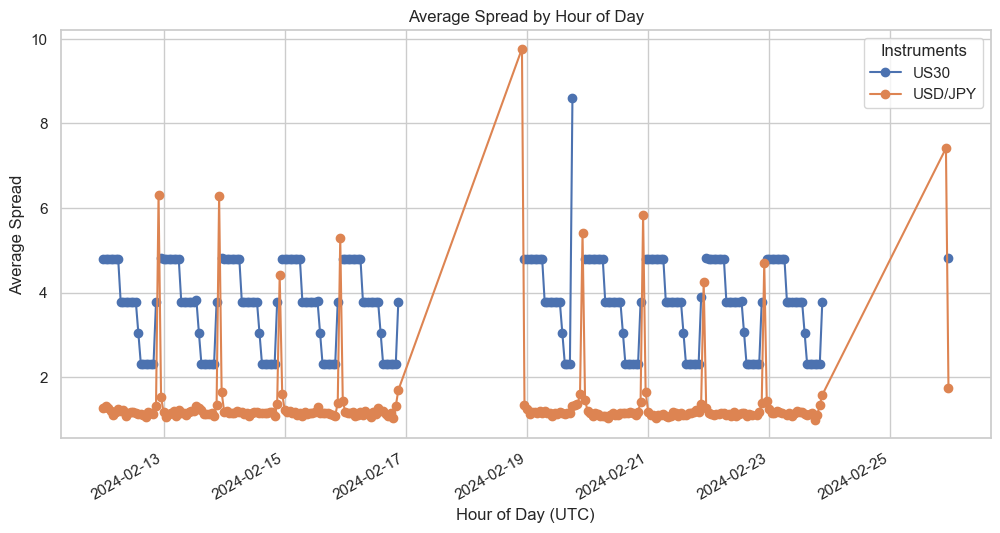

In [230]:
# Group by hour and instruments, then calculate the mean spread for each hour
hourly_trends = df.groupby(['quote_hour', 'symbol'])['avg_spread'].mean().unstack()

# Plot the hourly trends
hourly_trends.plot(figsize=(12, 6), marker='o')

# Beautifying the plot
plt.title("Average Spread by Hour of Day")
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Average Spread")
plt.legend(title="Instruments")

plt.show()

- Define outliers

In [219]:
# Calculate mean and standard deviation for each financial instrument
spread_stats = df.groupby('symbol')['avg_spread'].agg(['mean', 'std']).rename(columns={'mean': 'mean_spread', 'std': 'std_dev_spread'})

# Merge stats with original data for threshold comparisons
data = df.merge(spread_stats, on='symbol')

# Define upper and lower thresholds as 2 standard deviations from the mean
data['upper_threshold'] = data['mean_spread'] + 2 * data['std_dev_spread']
data['lower_threshold'] = data['mean_spread'] - 2 * data['std_dev_spread']

# Identify hours/days with spreads significantly different from the average
outliers = data[(data['avg_spread'] > data['upper_threshold']) | (data['avg_spread'] < data['lower_threshold'])]

# Display outliers
outliers[['quote_hour', 'symbol', 'avg_spread', 'upper_threshold', 'lower_threshold']]

,quote_hour,symbol,avg_spread,upper_threshold,lower_threshold
133,2024-02-19 18:00:00,US30,8.61,5.804971,1.710536
249,2024-02-12 22:00:00,USD/JPY,6.31,3.359372,-0.622843
273,2024-02-13 22:00:00,USD/JPY,6.28,3.359372,-0.622843
297,2024-02-14 22:00:00,USD/JPY,4.41,3.359372,-0.622843
334,2024-02-15 22:00:00,USD/JPY,5.29,3.359372,-0.622843
358,2024-02-18 22:00:00,USD/JPY,9.77,3.359372,-0.622843
382,2024-02-19 22:00:00,USD/JPY,5.4,3.359372,-0.622843
406,2024-02-20 22:00:00,USD/JPY,5.84,3.359372,-0.622843
430,2024-02-21 22:00:00,USD/JPY,4.25,3.359372,-0.622843
453,2024-02-22 22:00:00,USD/JPY,4.708799,3.359372,-0.622843


- Plot outliers

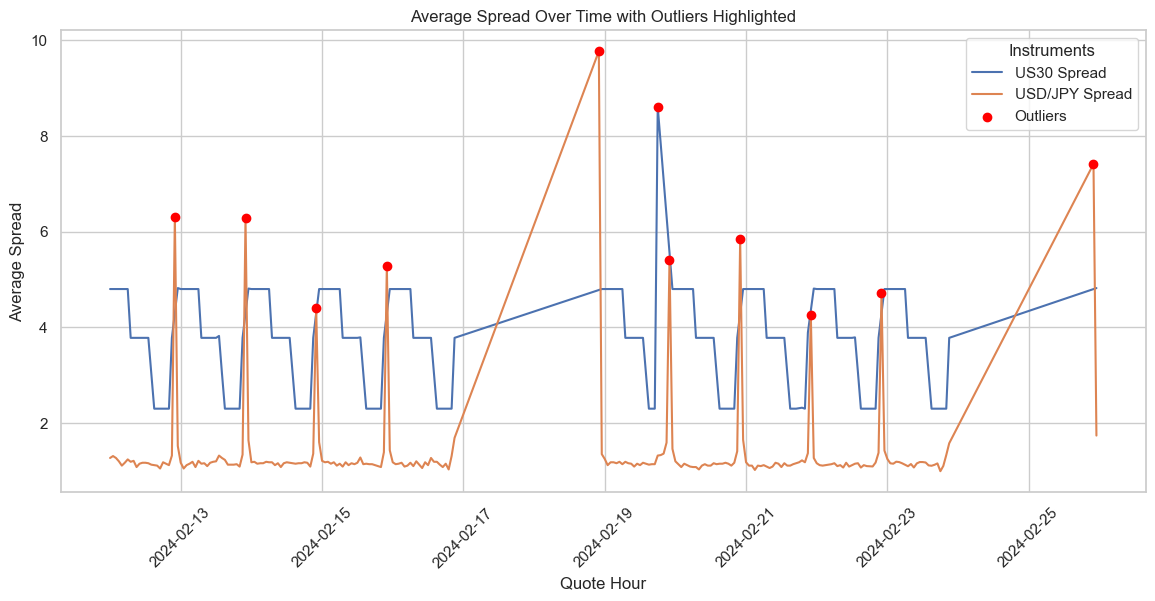

In [231]:
# Plot the average spread over time for each instruments with outliers highlighted
plt.figure(figsize=(14, 6))

# Plot the spread over time
for symbol in data['symbol'].unique():
    symbol_data = data[data['symbol'] == symbol]
    plt.plot(symbol_data['quote_hour'], symbol_data['avg_spread'], label=f'{symbol} Spread')

# Plot outliers as red points
plt.scatter(outliers['quote_hour'], outliers['avg_spread'], color='red', label='Outliers', zorder=5)

# Beautifying the plot
plt.title("Average Spread Over Time with Outliers Highlighted")
plt.xlabel("Quote Hour")
plt.ylabel("Average Spread")
plt.legend(title="Instruments")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

- Looking into daily averages
(For this particular plot, having more data would have helped in spotting patters.)

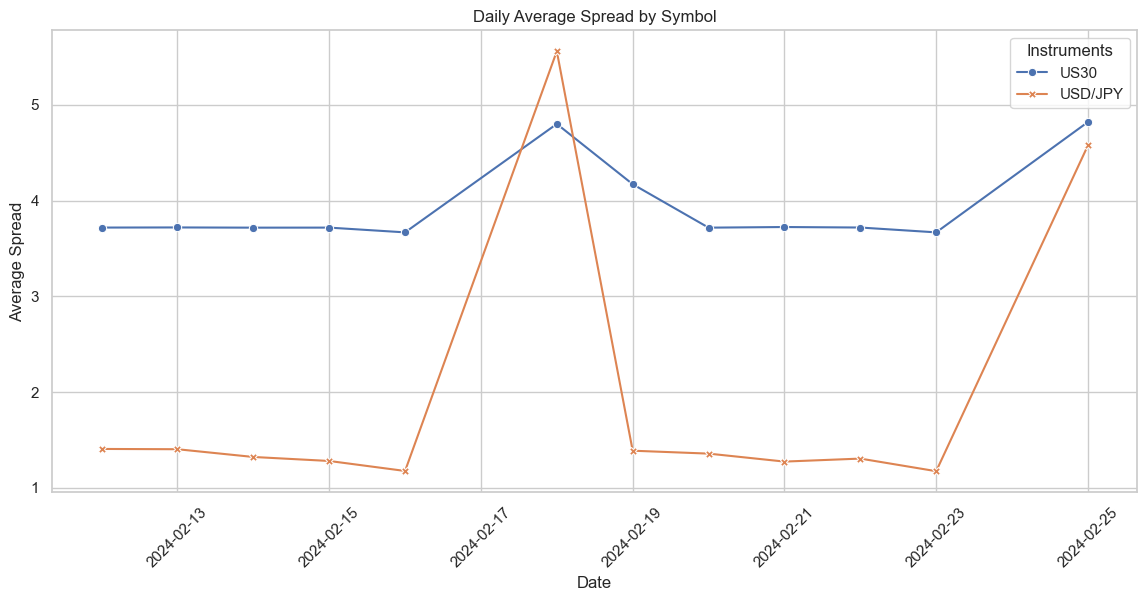

In [232]:
# Extract the date from the 'quote_hour' timestamp
data['date'] = data['quote_hour'].dt.date

# Group by date and financial instrument to calculate daily average spreads
daily_data = data.groupby(['date', 'symbol'])['avg_spread'].mean().unstack()

# Plot the daily average spreads for each financial instrument
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_data, markers=True, dashes=False)

# Beautifying the plot
plt.title("Daily Average Spread by Symbol")
plt.xlabel("Date")
plt.ylabel("Average Spread")
plt.legend(title="Instruments")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

Observations
- Patterns:
    - The average spreads for both US30 and USD/JPY tend to be lower during certain hours, particularly mid-afternoon (15:00) for US30 and late evenings (19:00) for USD/JPY.

- Trends:
    - For the US30, there’s a noticeable downward trend in average spreads from early morning (00:00) to mid-afternoon (15:00), after which they start to increase again.
    - USD/JPY shows relatively stable spreads with occasional peaks at certain hours (22:00).

- Anomalies:
    - A sudden spike in USD/JPY spreads on 02/12/2024 at 22:00 (6.31), 02/13/2024 at 22:00 (6.28), 02/18/2024 at 22:00 GMT (9.77) and on 02/25/2024 at 22:00 GMT (7.41).
    - A sudden spike in US30 spreads on 02/19/2024 at 18:00 (6.31)

Recommendations for Alerts
- Threshold-Based Alerts:

    - Set an alert if the spread for US30 goes below 2.5 or above 4.8.
    - Set an alert if the spread for USD/JPY exceeds 2.0, particularly monitoring the 22:00 GMT timeslot.

- Anomaly Detection:

    - Implement an anomaly detection method to identify values significantly different from the mean.